## 상대 대비 많이 나온 단어 알아볼 것 - 로그 오즈비

In [3]:
f = open("Data/speech_moon.txt", "rt")
moon = f.read()
f.close()

f = open("Data/speech_park.txt", "rt")
park = f.read()
f.close()

In [17]:
# 명사 추출
from konlpy.tag import Okt
okt = Okt()

moon_nouns = [i for i in okt.nouns(moon) if len(i) >= 2]
park_nouns = [i for i in okt.nouns(park) if len(i) >= 2]

moon_nouns

['정권',
 '교체',
 '정치',
 '교체',
 '시대',
 '교체',
 '불비',
 '불명',
 '고사',
 '남쪽',
 '언덕',
 '나뭇가지',
 '동안',
 '지도',
 '한번',
 '하늘',
 '한번',
 '울면',
 '천지',
 '뒤흔듭니',
 '동안',
 '정치',
 '거리',
 '시대',
 '정치',
 '이상',
 '남쪽',
 '나뭇가지',
 '이제',
 '국민',
 '높이',
 '크게',
 '오늘',
 '대통령선거',
 '출마',
 '국민',
 '선언',
 '우리나라',
 '대통령',
 '존경',
 '국민',
 '여러분',
 '대통령',
 '우리나라',
 '대통령',
 '소수',
 '특권',
 '나라',
 '보통사람',
 '주인',
 '우리나라',
 '우리나라',
 '우리',
 '조금',
 '우리나라',
 '대통령',
 '지금',
 '우리',
 '보통사람',
 '지도',
 '나라',
 '주인',
 '행세',
 '주인',
 '이제',
 '정치',
 '참여',
 '추구',
 '우리나라',
 '정치인',
 '나라',
 '시민',
 '직접',
 '정치',
 '정책',
 '과정',
 '참여',
 '나라',
 '시민',
 '동행',
 '정치',
 '추구',
 '우리나라',
 '특권',
 '불평등',
 '나라',
 '보통사람',
 '기회',
 '정의',
 '나라',
 '이제',
 '권력',
 '집단',
 '나라',
 '마음대로',
 '움직',
 '시대',
 '사람',
 '희생',
 '강요',
 '경제',
 '정치',
 '권력',
 '모두',
 '오늘',
 '문재인',
 '우리나라',
 '우리',
 '모두',
 '나라',
 '선언',
 '국민',
 '모두',
 '높이',
 '크게',
 '결심',
 '이유',
 '보통사람',
 '우리',
 '현실',
 '때문',
 '근본',
 '혁신',
 '전환',
 '나라',
 '절박',
 '때문',
 '지금',
 '우리',
 '우리',
 '사회',
 '이상',
 '경제성장',
 '과실',
 '소수',
 '부유',
 '대

In [18]:
# 빈도 분석
from collections import Counter

moon_dic = Counter(moon_nouns)
park_dic = Counter(park_nouns)

moon_dic

Counter({'나라': 26,
         '국민': 21,
         '일자리': 21,
         '대통령': 17,
         '우리': 17,
         '사회': 16,
         '산업': 14,
         '성장': 13,
         '사람': 12,
         '평화': 12,
         '대한민국': 11,
         '확대': 11,
         '우리나라': 10,
         '복지': 10,
         '지금': 9,
         '혁신': 9,
         '정부': 9,
         '국가': 9,
         '교육': 9,
         '정치': 8,
         '경제': 8,
         '위해': 8,
         '복지국가': 8,
         '정의': 7,
         '모두': 7,
         '불안': 7,
         '추진': 7,
         '아이': 6,
         '세상': 6,
         '경쟁': 6,
         '여성': 6,
         '투자': 6,
         '통해': 6,
         '이제': 5,
         '선언': 5,
         '특권': 5,
         '보통사람': 5,
         '정책': 5,
         '기회': 5,
         '고용': 5,
         '더욱': 5,
         '지방': 5,
         '협력': 5,
         '상생': 5,
         '지원': 5,
         '구조': 5,
         '학습': 5,
         '한반도': 5,
         '담쟁이': 5,
         '높이': 4,
         '크게': 4,
         '출마': 4,
         '주인': 4,
         '시민': 4,
  

In [23]:
# 데이터프레임 형태로
import pandas as pd
moon_df = pd.DataFrame(moon_dic.items(), columns = ["word", "count"])
park_df = pd.DataFrame(park_dic.items(), columns = ["word", "count"])

moon_df["President"] = "문재인"
park_df["President"] = "박근혜"

# 두 데이터프레임 병합
df = pd.concat([moon_df, park_df])
df

,word,count,President
0,정권,3,문재인
1,교체,3,문재인
2,정치,8,문재인
3,시대,3,문재인
4,불비,1,문재인
...,...,...,...
394,최선,1,박근혜
395,다해,1,박근혜
396,새누리당,1,박근혜
397,예비,1,박근혜


In [34]:
pivot_df = df.pivot_table(index = "word", columns = "President", 
                          values = "count", aggfunc = "sum").fillna(0)

pivot_df["moon_ratio"] = (pivot_df["문재인"]+1) / sum(pivot_df["문재인"]+1)        # 문재인이 사용한 총 단어 수에 대한 해당 단어의 비율
pivot_df["park_ratio"] = (pivot_df["박근혜"]+1) / sum(pivot_df["박근혜"]+1) 
pivot_df

# ratio 값으로 누가 더 중요하게 생각하는지 파악 가능

President,문재인,박근혜,moon_ratio,park_ratio
word,,,,
가난,0.0,1.0,0.000438,0.001143
가동,1.0,0.0,0.000876,0.000571
가득,1.0,0.0,0.000876,0.000571
가르침,1.0,0.0,0.000876,0.000571
가사,1.0,0.0,0.000876,0.000571
...,...,...,...,...
흐름,1.0,0.0,0.000876,0.000571
흡수,1.0,0.0,0.000876,0.000571
희망,4.0,0.0,0.002191,0.000571


In [42]:
import numpy as np

pivot_df["odds_ratio"] = pivot_df["moon_ratio"] / pivot_df["park_ratio"]    # 오즈비가 1보다 크면 moon이 중요하게 생각, 1보다 작으면 park이 중요하게 생각
pivot_df["log_odds_ratio"] = np.log(pivot_df["odds_ratio"])            # 로그 씌워서 양수가 나오면 moon이 중요하게 생각, 음수가 나오면 park이 중요하게 생각
pivot_df = pivot_df.sort_values("log_odds_ratio", ascending = True)
pivot_df

President,문재인,박근혜,moon_ratio,park_ratio,odds_ratio,log_odds_ratio
word,,,,,,
행복,0.0,20.0,0.000438,0.012000,0.036518,-3.309959
박근혜,0.0,9.0,0.000438,0.005714,0.076687,-2.568022
과제,0.0,6.0,0.000438,0.004000,0.109553,-2.211347
핵심,0.0,5.0,0.000438,0.003429,0.127812,-2.057196
실천,0.0,5.0,0.000438,0.003429,0.127812,-2.057196
...,...,...,...,...,...,...
나라,26.0,3.0,0.011832,0.002286,5.176380,1.644106
세상,6.0,0.0,0.003067,0.000571,5.368098,1.680474
여성,6.0,0.0,0.003067,0.000571,5.368098,1.680474


In [51]:
import warnings
warnings.filterwarnings("ignore")

A = pivot_df.head(10)     # 박근혜가 문재인 대비 중요하게 생각하는 단어 10개 
B = pivot_df.tail(10)     # 문재인이 박근혜 대비 중요하게 생각하는 단어 10개 

A["대통령"] = "박근혜"
B["대통령"] = "문재인"

result = pd.concat([A, B])
result

President,문재인,박근혜,moon_ratio,park_ratio,odds_ratio,log_odds_ratio,대통령
word,,,,,,,
행복,0.0,20.0,0.000438,0.012000,0.036518,-3.309959,박근혜
박근혜,0.0,9.0,0.000438,0.005714,0.076687,-2.568022,박근혜
과제,0.0,6.0,0.000438,0.004000,0.109553,-2.211347,박근혜
핵심,0.0,5.0,0.000438,0.003429,0.127812,-2.057196,박근혜
실천,0.0,5.0,0.000438,0.003429,0.127812,-2.057196,박근혜
운영,0.0,5.0,0.000438,0.003429,0.127812,-2.057196,박근혜
여러분,3.0,22.0,0.001753,0.013143,0.133369,-2.014636,박근혜
지식,0.0,4.0,0.000438,0.002857,0.153374,-1.874874,박근혜
다시,0.0,4.0,0.000438,0.002857,0.153374,-1.874874,박근혜


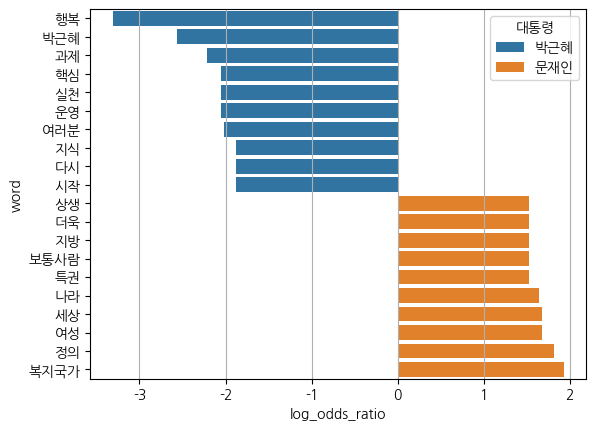

In [52]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=result, x = "log_odds_ratio", y = "word", hue = "대통령")
plt.grid(axis = "x")
plt.show()

## 문서가 많을 때 특정문서가 다른문서에 비해 어떤 단어가 많이 나왔는지

### 이명박 vs 노무현 : Log odds ratio

In [54]:
df = pd.read_csv("Data/speeches_presidents.csv")
df

,president,value
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...


In [74]:
lee = df.loc[2]["value"]
no = df.loc[3]["value"]

lee

'존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임감을 갖고 이 자리에 섰습니다. 이 문명사적 전환기를 뚫고 대한민국을 세계 속에 우뚝 서게 해야 한다는 시대의 명령에 엄중한 역사의 무게를 느낍니다. 서민은 지금 고통스런 삶에 희망을 달라고 하고 있습니다. 이 절박한 요구를 외면할 수 없습니다. 저는 대한민국을 사랑합니다. 대한민국이 자랑스럽습니다. 끼니를 잇기도 힘들었던 가난한 청년이 대기업의 CEO와 서울 시장을 거쳐 오늘 나라를 이끄는 자리에 나설 수 있게 한 나라가 바로 대한민국입니다. 하지만 지난 10년 우리는 발전의 위기를 겪고 있습니다. 국민들은 자신감을 잃고 있습니다. 스스로를 중산층이라고 생각하는 사람들이 10년 동안 절반으로 줄었습니다. 미래에 대해 낙관하는 사람보다 비관하는 사람이 더 많아졌습니다. 인생은 길어졌는데 어떻게 살아야 하는지에 대해서는 불안하기만 합니다. 낙관의 역사가 비관의 역사로 바뀌고 있습니다. 그 책임은 리더십에 있습니다. 무능한 이념 세력이 나라를 제대로 이끌지 못했습니다. 미래로 나아가기보다는 과거에 묶여 있었습니다. 경제에 활력을 넣기보다는 발목을 잡았습니다. 투자 부진, 일자리 부족, 소비 부진의 악순환이 자리 잡았습니다. 양극화는 더욱 심화되고 있습니다. 지난 몇 달 각계각층의 국민들을 만났습니다. 그들이 내뱉는 민생의 신음 소리는 아직도 제 귓가에 생생합니다. 기회의 나라가 좌절의 나라가 되어버렸습니다. 외교도 어려워졌습니다. 북한에 끌려 다닌 남북 관계는 북한 핵개발로 귀결되었습니다. 세계의 중심으로 나아가야 하는 시기에 오히려 우리는 세계의 중심에서 밀려나고 있습니다. 오랜 시간 경제 현장에서 세계와 경쟁하며 온 힘을 다해온 저로서는 안타깝기 짝이 없는 일입니다. 시간은 우리를 기다려주지 않습니다. 대한민국이 이대로 주저앉느냐, 새롭게 도약하느냐는 앞으로 5년 내에 결정될 것입니다. 앞으로 5년이 한민족의 21세기를 좌우하게 될 것입니다. 존경하는 국민 여러분, 사랑하는 한

In [82]:
from konlpy.tag import Okt
okt = Okt()

lee_nouns = [i for i in okt.nouns(lee) if len(i) >= 2]
no_nouns = [i for i in okt.nouns(no) if len(i) >= 2]

lee_dic = Counter(lee_nouns)
no_dic = Counter(no_nouns)

lee_df = pd.DataFrame(lee_dic.items(), columns = ["word", "count"])
no_df = pd.DataFrame(no_dic.items(), columns = ["word", "count"])

lee_df["President"] = "이명박"
no_df["President"] = "노무현"

df = pd.concat([lee_df, no_df])
df

,word,count,President
0,존경,4,이명박
1,국민,13,이명박
2,여러분,11,이명박
3,사랑,5,이명박
4,한나라당,7,이명박
...,...,...,...
227,선언,3,노무현
228,공식,6,노무현
229,자꾸,1,노무현
230,신문,1,노무현


In [84]:
pivot_df = df.pivot_table(index = "word", columns = "President", 
                          values = "count", aggfunc = "sum").fillna(0)

pivot_df["lee_ratio"] = (pivot_df["이명박"]+1) / sum(pivot_df["이명박"]+1)        # 문재인이 사용한 총 단어 수에 대한 해당 단어의 비율
pivot_df["no_ratio"] = (pivot_df["노무현"]+1) / sum(pivot_df["노무현"]+1) 

pivot_df["odds_ratio"] = pivot_df["lee_ratio"] / pivot_df["no_ratio"]    # 오즈비가 1보다 크면 moon이 중요하게 생각, 1보다 작으면 park이 중요하게 생각
pivot_df["log_odds_ratio"] = np.log(pivot_df["odds_ratio"])            # 로그 씌워서 양수가 나오면 moon이 중요하게 생각, 음수가 나오면 park이 중요하게 생각
pivot_df = pivot_df.sort_values("log_odds_ratio", ascending = True)

A = pivot_df.head(10)     # 박근혜가 문재인 대비 중요하게 생각하는 단어 10개 
B = pivot_df.tail(10)     # 문재인이 박근혜 대비 중요하게 생각하는 단어 10개 

A["대통령"] = "이명박"
B["대통령"] = "노무현"

result = pd.concat([A, B])
result

President,노무현,이명박,lee_ratio,no_ratio,odds_ratio,log_odds_ratio,대통령
word,,,,,,,
권력,9.0,0.0,0.001245,0.012579,0.099004,-2.312598,이명박
정계,8.0,0.0,0.001245,0.011321,0.110004,-2.207237,이명박
공식,6.0,0.0,0.001245,0.008805,0.141434,-1.955923,이명박
개편,6.0,0.0,0.001245,0.008805,0.141434,-1.955923,이명박
비젼,6.0,0.0,0.001245,0.008805,0.141434,-1.955923,이명박
정의,4.0,0.0,0.001245,0.006289,0.198007,-1.619451,이명박
지역,4.0,0.0,0.001245,0.006289,0.198007,-1.619451,이명박
정치,8.0,1.0,0.002491,0.011321,0.220008,-1.514090,이명박
이제,3.0,0.0,0.001245,0.005031,0.247509,-1.396307,이명박


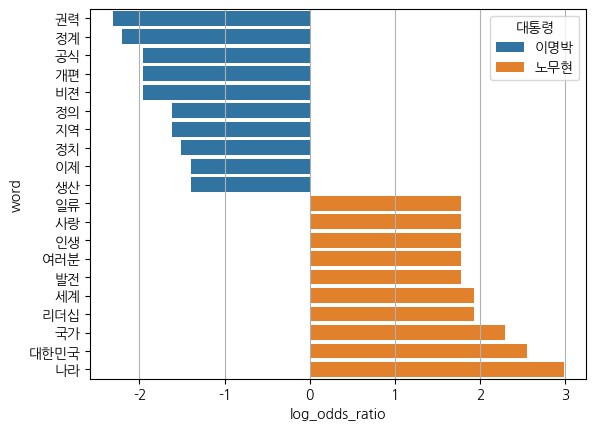

In [85]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=result, x = "log_odds_ratio", y = "word", hue = "대통령")
plt.grid(axis = "x")
plt.show()

### 4명 비교 

In [86]:
def make_nouns(x):
    nouns = [i for i in okt.nouns(x) if len(i) >= 2]
    return nouns

df = pd.read_csv("Data/speeches_presidents.csv")

df["nouns"] = df["value"].apply(make_nouns)
df["nouns"]

0    [정권, 교체, 정치, 교체, 시대, 교체, 불비, 불명, 고사, 남쪽, 언덕, 나...
1    [존경, 국민, 여러분, 오늘, 국민, 대한민국, 만들기, 위해, 모든, 각오, 자...
2    [존경, 국민, 여러분, 사랑, 한나라당, 당원, 동지, 여러분, 오늘, 책임감, ...
3    [부터, 대통령, 시작, 무엇, 무엇, 비젼, 비젼, 생각, 마음, 가장, 비젼, ...
Name: nouns, dtype: object

In [89]:
# 고유한 단어 찾기
unique_words = set()     # 집합 - 중복 허용X
for i in df["nouns"]:
    for j in i:
        unique_words.add(j)

print(unique_words)

{'순국선열', '감당', '예산', '공유', '독식', '한참', '새누리당', '편입', '평화', '국경', '한민족', '감옥', '제도', '경기', '분야', '플랜', '국회의원', '남북한', '생애', '대적', '집단', '존재', '외면', '제대로', '위정', '진보', '훗날', '간과', '모델', '고등학교', '공기업', '모작', '소수', '비정규직', '래서', '구도', '제조', '의견', '남녀', '손바닥', '표정', '보고', '저출산', '손해', '대비', '소득', '지배구조', '자고', '수출', '방식', '고사', '사회', '패자', '용인', '연륜', '더욱', '냉전', '하라', '채택', '재편', '명분', '착오', '문화', '정쟁', '아이', '지원', '안정', '올해', '금강산', '발생', '마음', '소용', '자신감', '영역', '개선', '완성', '소외', '지출', '명감', '구현', '민주주의', '결심', '위로', '중등교육', '근간', '이익', '개천', '문민', '전통', '중요성', '정의', '김대중', '녹색', '국정', '운명', '비관', '옛날', '결과', '지대', '비방', '우뚝', '보따리', '수평', '보이지', '가야', '직속', '전두환', '만큼', '창의성', '트롤', '보상', '연대', '오늘', '일이', '협업', '패러다임', '조절', '서서히', '하루', '중국', '경영', '폭풍', '약속', '책임', '헌신', '과학', '준비', '과실', '길이', '의료', '정거', '살림', '적극', '연금', '기별', '전진', '인식', '측근', '재벌', '신재생에너지', '청소', '시장경제', '공정사회', '만능', '활성화', '남북', '생활', '사고', '빈부격차', '피하', '정치가', '유아', '해방', '해결', '회의', '콘텐츠', '근로', '그동안', '기본'

In [95]:
# DF: 단어별 문서빈도
DF_dic = {}
for i in unique_words:      # 고유한 단어 하나씩 꺼내서
    count = 0
    for j in df["nouns"]:
        if i in j:
            count += 1
    DF_dic[i] = count

print(DF_dic)
# 각 단어마다 몇명의 대통령이 사용했는지 = 단어가 몇개의 문서(대통령)에 출현했는지

{'순국선열': 1, '감당': 1, '예산': 1, '공유': 2, '독식': 1, '한참': 1, '새누리당': 2, '편입': 1, '평화': 3, '국경': 1, '한민족': 1, '감옥': 1, '제도': 2, '경기': 1, '분야': 1, '플랜': 1, '국회의원': 1, '남북한': 2, '생애': 1, '대적': 1, '집단': 1, '존재': 1, '외면': 3, '제대로': 3, '위정': 1, '진보': 1, '훗날': 1, '간과': 1, '모델': 3, '고등학교': 1, '공기업': 1, '모작': 2, '소수': 1, '비정규직': 1, '래서': 1, '구도': 1, '제조': 1, '의견': 1, '남녀': 1, '손바닥': 1, '표정': 1, '보고': 2, '저출산': 1, '손해': 2, '대비': 2, '소득': 3, '지배구조': 1, '자고': 1, '수출': 1, '방식': 2, '고사': 1, '사회': 4, '패자': 1, '용인': 1, '연륜': 1, '더욱': 2, '냉전': 2, '하라': 1, '채택': 1, '재편': 1, '명분': 1, '착오': 1, '문화': 2, '정쟁': 1, '아이': 3, '지원': 2, '안정': 2, '올해': 1, '금강산': 1, '발생': 1, '마음': 4, '소용': 1, '자신감': 1, '영역': 1, '개선': 1, '완성': 1, '소외': 1, '지출': 1, '명감': 1, '구현': 1, '민주주의': 1, '결심': 1, '위로': 1, '중등교육': 1, '근간': 1, '이익': 1, '개천': 1, '문민': 1, '전통': 1, '중요성': 1, '정의': 2, '김대중': 1, '녹색': 1, '국정': 1, '운명': 1, '비관': 1, '옛날': 1, '결과': 2, '지대': 1, '비방': 1, '우뚝': 1, '보따리': 1, '수평': 1, '보이지': 1, '가야': 3, '직속': 1, '전두환': 1, '만큼': 1

In [105]:
# TF: 단어 빈도
df2 = df.explode("nouns")[["president", "nouns"]]    # nouns 리스트에 있던 걸 쭉 풀어서
df3 = df2.groupby(["president", "nouns"]).size().reset_index(name = "TF")
df3

,president,nouns,TF
0,노무현,가면,1
1,노무현,가슴,2
2,노무현,가야,1
3,노무현,가장,1
4,노무현,가지,1
...,...,...,...
1521,이명박,혼자,1
1522,이명박,환기,1
1523,이명박,후보,1
1524,이명박,희망,2


In [108]:
def make_DF(x):
    return DF_dic[x]         # DF 딕셔너리의 value값 뽑아줌

df3["DF"] = df3["nouns"].apply(make_DF)
df3

# ex.가면) 노무현이 가면이란 단어를 1번 썼는데  이걸 쓴 대통령이 1명이다

,president,nouns,TF,DF
0,노무현,가면,1,1
1,노무현,가슴,2,3
2,노무현,가야,1,3
3,노무현,가장,1,4
4,노무현,가지,1,4
...,...,...,...,...
1521,이명박,혼자,1,2
1522,이명박,환기,1,1
1523,이명박,후보,1,3
1524,이명박,희망,2,2


In [111]:
## DF가 작은게 좋으므로 역수 취해서 뒤집는다
df3["IDF"] = np.log( 4 / df3["DF"])
df3["TF-IDF"] = df3["TF"] * df3["IDF"]
df3

,president,nouns,TF,DF,IDF,TF-IDF
0,노무현,가면,1,1,1.386294,1.386294
1,노무현,가슴,2,3,0.287682,0.575364
2,노무현,가야,1,3,0.287682,0.287682
3,노무현,가장,1,4,0.000000,0.000000
4,노무현,가지,1,4,0.000000,0.000000
...,...,...,...,...,...,...
1521,이명박,혼자,1,2,0.693147,0.693147
1522,이명박,환기,1,1,1.386294,1.386294
1523,이명박,후보,1,3,0.287682,0.287682
1524,이명박,희망,2,2,0.693147,1.386294


In [113]:
df3[df3["president"] == "문재인"].sort_values("TF-IDF", ascending = False)
## 해당 단어들이 문재인 대통령이 다른 사람들보다 특화된 단어들이다

,president,nouns,TF,DF,IDF,TF-IDF
493,문재인,복지국가,8,1,1.386294,11.090355
529,문재인,산업,14,2,0.693147,9.704061
623,문재인,여성,6,1,1.386294,8.317766
895,문재인,확대,11,2,0.693147,7.624619
358,문재인,나라,26,3,0.287682,7.479734
...,...,...,...,...,...,...
528,문재인,사회,16,4,0.000000,0.000000
646,문재인,우리,17,4,0.000000,0.000000
637,문재인,오늘,2,4,0.000000,0.000000
538,문재인,생각,1,4,0.000000,0.000000


### 이재명 대통령이 다른 대통령에 비해서 강한 단어 10개 찾아보기

In [115]:
df = pd.read_excel("Data/Speeches_President.xlsx")
df

,president,value
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대..."
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임..."
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...
4,이재명,"존경하고 사랑하는 국민 여러분, 여러분이 선택해 주신 대한민국 제21대 대통령 이재..."


In [116]:
def make_nouns(x):
    nouns = [i for i in okt.nouns(x) if len(i) >= 2]
    return nouns
    
df["nouns"] = df["value"].apply(make_nouns)
df["nouns"]

0    [정권, 교체, 정치, 교체, 시대, 교체, 불비, 불명, 고사, 남쪽, 언덕, 나...
1    [존경, 국민, 여러분, 오늘, 국민, 대한민국, 만들기, 위해, 모든, 각오, 자...
2    [존경, 국민, 여러분, 사랑, 한나라당, 당원, 동지, 여러분, 오늘, 책임감, ...
3    [부터, 대통령, 시작, 무엇, 무엇, 비젼, 비젼, 생각, 마음, 가장, 비젼, ...
4    [존경, 사랑, 국민, 여러분, 여러분, 선택, 주신, 대한민국, 대통령, 이재명,...
Name: nouns, dtype: object

In [125]:
# 고유한 단어 찾기
unique_words = set()
for i in df["nouns"]:
    for j in i:
        unique_words.add(j)

# DF: 단어별 문서빈도
DF_dic = {}
for i in unique_words:      # 고유한 단어 하나씩 꺼내서
    count = 0
    for j in df["nouns"]:
        if i in j:
            count += 1
    DF_dic[i] = count
    
# TF: 단어 빈도
df2 = df.explode("nouns")[["president", "nouns"]]    # nouns 리스트에 있던 걸 쭉 풀어서
df3 = df2.groupby(["president", "nouns"]).size().reset_index(name = "TF")


def make_DF(x):
    return DF_dic[x]         # DF 딕셔너리의 value값 뽑아줌

df3["DF"] = df3["nouns"].apply(make_DF)
df3["IDF"] = np.log(5 / df3["DF"])
df3["TF-IDF"] = df3["TF"] * df3["IDF"]
df3

,president,nouns,TF,DF,IDF,TF-IDF
0,노무현,가면,1,2,0.916291,0.916291
1,노무현,가슴,2,3,0.510826,1.021651
2,노무현,가야,1,3,0.510826,0.510826
3,노무현,가장,1,5,0.000000,0.000000
4,노무현,가지,1,5,0.000000,0.000000
...,...,...,...,...,...,...
1991,이재명,회복,2,1,1.609438,3.218876
1992,이재명,후손,1,1,1.609438,1.609438
1993,이재명,흐름,1,2,0.916291,0.916291
1994,이재명,희망,4,3,0.510826,2.043302


In [127]:
df3[df3["president"] == "이재명"].sort_values("TF-IDF", ascending = False).head(10)

,president,nouns,TF,DF,IDF,TF-IDF
1828,이재명,위협,7,1,1.609438,11.266065
1688,이재명,민주주의,9,2,0.916291,8.246617
1786,이재명,안전,5,1,1.609438,8.047190
1613,이재명,내란,4,1,1.609438,6.437752
1894,이재명,주권,4,1,1.609438,6.437752
1686,이재명,민주공화국,4,1,1.609438,6.437752
1682,이재명,문화,10,3,0.510826,5.108256
1820,이재명,오직,3,1,1.609438,4.828314
1581,이재명,국익,3,1,1.609438,4.828314
1928,이재명,참사,3,1,1.609438,4.828314


## TF-IDF 라이브러리 사용법

### TF-IDF 라이브러리 사용 예제1

In [130]:
from konlpy.tag import Okt

df = pd.read_excel("Data/Speeches_President.xlsx")

okt = Okt()

def make_nouns(x):
    return [i for i in okt.nouns(x) if len(i) >= 2]

def combine_text(x):        # 리스트로 된 nouns를 한문장으로 만들어줄 것
    return " ".join(x)

df["nouns"] = df['value'].apply(make_nouns)
df["nouns"] = df["nouns"].apply(combine_text)
df

,president,value,nouns
0,문재인,정권교체 하겠습니다! 정치교체 하겠습니다! 시대교체 하겠습니다! ‘불비불...,정권 교체 정치 교체 시대 교체 불비 불명 고사 남쪽 언덕 나뭇가지 동안 지도 한번...
1,박근혜,"존경하는 국민 여러분! 저는 오늘, 국민 한 분 한 분의 꿈이 이루어지는 행복한 대...",존경 국민 여러분 오늘 국민 대한민국 만들기 위해 모든 각오 자리 박근혜 이번 대통...
2,이명박,"존경하는 국민 여러분, 사랑하는 한나라당 당원 동지 여러분! 저는 오늘 무거운 책임...",존경 국민 여러분 사랑 한나라당 당원 동지 여러분 오늘 책임감 자리 문명 사적 환기...
3,노무현,어느때인가 부터 제가 대통령이 되겠다고 말을 하기 시작했습니다. 많은 분들이 제게 ...,부터 대통령 시작 무엇 무엇 비젼 비젼 생각 마음 가장 비젼 그것 전두환 대통령 놨...
4,이재명,"존경하고 사랑하는 국민 여러분, 여러분이 선택해 주신 대한민국 제21대 대통령 이재...",존경 사랑 국민 여러분 여러분 선택 주신 대한민국 대통령 이재명 인사 책임감 자리 ...


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

model = TfidfVectorizer()
tf_idf = model.fit_transform(df["nouns"])

result = pd.DataFrame(tf_idf.toarray(), 
                      columns = model.get_feature_names_out(),
                      index = df["president"])
result
# 각 단어마다 대통령별로 tf-idf값 구한 것

,가난,가동,가득,가로막,가르침,가면,가사,가슴,가시,가야,...,후손,훈련,훗날,휴전선,흉탄,흐름,흡수,희망,희망이,희생
president,,,,,,,,,,,,,,,,,,,,,
문재인,0.000000,0.014534,0.018015,0.000000,0.018015,0.000000,0.018015,0.024129,0.000000,0.024129,...,0.000000,0.000000,0.018015,0.018015,0.000000,0.014534,0.018015,0.048258,0.000000,0.029068
박근혜,0.018873,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012639,0.000000,0.012639,...,0.000000,0.018873,0.000000,0.000000,0.018873,0.000000,0.000000,0.000000,0.015227,0.000000
이명박,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.049912,0.000000,0.030064
노무현,0.000000,0.000000,0.000000,0.000000,0.000000,0.031498,0.000000,0.052292,0.000000,0.026146,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
이재명,0.000000,0.018511,0.000000,0.022944,0.000000,0.018511,0.000000,0.000000,0.022944,0.000000,...,0.022944,0.000000,0.000000,0.000000,0.000000,0.018511,0.000000,0.061464,0.018511,0.000000


In [140]:
columns = model.get_feature_names_out()

for i in range(len(result)):
    row = result.iloc[i]
    idx = np.argsort(row)[::-1][:5]    # 큰값부터 정렬
    print(result.index[i], columns[idx])

문재인 ['나라' '일자리' '국민' '산업' '대통령']
박근혜 ['국민' '행복' '여러분' '정부' '박근혜']
이명박 ['나라' '대한민국' '세계' '국민' '리더십']
노무현 ['정계' '권력' '개편' '공식' '비젼']
이재명 ['국민' '성장' '대한민국' '나라' '민주주의']


### TF-IDF 라이브러리 사용 예제2

In [141]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

df = pd.read_excel("Data/text data.xlsx").dropna()

okt = Okt()

def tokenizer(x):
    return okt.morphs(x)

cv = CountVectorizer(tokenizer=tokenizer)

X = cv.fit_transform(df["document"])
X

<37533x47758 sparse matrix of type '<class 'numpy.int64'>'
	with 496276 stored elements in Compressed Sparse Row format>

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

Y = df["label"].values

train_x, test_x, train_y, test_y = train_test_split(X, Y)

model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

In [146]:
pred = model.predict(test_x)
report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4732
           1       0.81      0.77      0.79      4652

    accuracy                           0.80      9384
   macro avg       0.80      0.80      0.80      9384
weighted avg       0.80      0.80      0.80      9384



In [148]:
text = "이 영화는 너무 재미있었어!"
A = cv.transform([text])
model.predict(A)
# 긍정적이라고 예측하고 있음

array([1], dtype=int64)

## 컴퓨터가 단어의 문맥을 이해할 수 있게 하는 방법 

### 1. n-gram

In [149]:
# 나는 너를 좋아하지 않아
# 나는 너를 좋아해 하지 않아
# 순서를 잃으면 안되는 경우도 있따?

corpus = [
    'He is a great person.',
    'Python is a great programming language.'
]

# n-gram - unigram
cv = CountVectorizer(ngram_range=(1,1))        # 한단어씩 묶겠다
cv.fit_transform(corpus)
cv.get_feature_names_out()

array(['great', 'he', 'is', 'language', 'person', 'programming', 'python'],
      dtype=object)

In [150]:
# n-gram - bigram
cv = CountVectorizer(ngram_range=(2,2))        # 두개씩 묶겠다
cv.fit_transform(corpus)
cv.get_feature_names_out()

array(['great person', 'great programming', 'he is', 'is great',
       'programming language', 'python is'], dtype=object)

In [151]:
# unigram + bigram
cv = CountVectorizer(ngram_range=(1,2))        # uni, bi 같이 구하고싶다
cv.fit_transform(corpus)
cv.get_feature_names_out()

array(['great', 'great person', 'great programming', 'he', 'he is', 'is',
       'is great', 'language', 'person', 'programming',
       'programming language', 'python', 'python is'], dtype=object)

### 2. 단어 임베딩

In [153]:
import numpy as np
from gensim.models import Word2Vec

# 1. 학습에 사용할 문장 데이터 (토큰화된 리스트의 리스트 형태)
corpus = [
    ['king', 'is', 'a', 'man'], ['queen', 'is', 'a', 'woman'],
    ['king', 'is', 'a', 'man'], ['queen', 'is', 'a', 'woman'],
    ['king', 'is', 'a', 'man'], ['queen', 'is', 'a', 'woman'],
    ['king', 'is', 'a', 'man'], ['queen', 'is', 'a', 'woman'],
    ['a', 'man', 'is', 'a', 'king'], ['a', 'woman', 'is', 'a', 'queen'],
    ['a', 'man', 'is', 'a', 'king'], ['a', 'woman', 'is', 'a', 'queen'],
    ['the', 'king', 'rules'], ['the', 'queen', 'rules'],
    ['the', 'king', 'rules'], ['the', 'queen', 'rules'],
    ['the', 'king', 'rules'], ['the', 'queen', 'rules'],
    ['a', 'wise', 'king'], ['a', 'wise', 'queen'],
    ['a', 'strong', 'king'], ['a', 'strong', 'queen'],
    ['a', 'king', 'is', 'a', 'royal', 'man'], ['a', 'queen', 'is', 'a', 'royal', 'woman'],
    ['the', 'king', 'has', 'a', 'prince'], ['the', 'queen', 'has', 'a', 'prince'],
    ['the', 'king', 'has', 'a', 'princess'], ['the', 'queen', 'has', 'a', 'princess'],
    ['prince', 'is', 'a', 'boy'], ['princess', 'is', 'a', 'girl'],
    ['a', 'boy', 'is', 'a', 'young', 'man'], ['a', 'girl', 'is', 'a', 'young', 'woman'],
    ['prince', 'is', 'a', 'son'], ['princess', 'is', 'a', 'daughter'],
    ['the', 'son', 'of', 'a', 'king', 'is', 'a', 'prince'],
    ['the', 'daughter', 'of', 'a', 'queen', 'is', 'a', 'princess'],
    ['the', 'son', 'is', 'a', 'man'], ['the', 'daughter', 'is', 'a', 'woman'],
    ['the', 'man', 'is', 'the', 'king'], ['the', 'woman', 'is', 'the', 'queen'],
    ['a', 'man', 'is', 'what', 'a', 'king', 'is'],
    ['a', 'woman', 'is', 'what', 'a', 'queen', 'is'],
    ['royalty', 'for', 'a', 'man', 'is', 'a', 'king'],
    ['royalty', 'for', 'a', 'woman', 'is', 'a', 'queen'],
    ['the', 'kingdom', 'has', 'a', 'king'], ['the', 'kingdom', 'has', 'a', 'queen'],
    ['the', 'kingdom', 'needs', 'a', 'king'], ['the', 'kingdom', 'needs', 'a', 'queen'],
    ['a', 'king', 'is', 'the', 'ruler'], ['a', 'queen', 'is', 'the', 'ruler'],
]

In [155]:
model = Word2Vec(sentences=corpus,
                 vector_size=10,
                 window=5, min_count=1, epochs=1000, sg=1, seed = 42)        # 사용이 유사한 거에 대해서는 임베딩 값이 유사하게 나타난다

model.wv["king"]      # "king"이라는 단어에 대한 가중치 벡터 

array([-0.44216254,  0.19504175, -0.42383987,  0.09220555,  0.68053967,
        0.5175968 , -0.51968354,  0.65223753, -0.21367037, -0.2569898 ],
      dtype=float32)

In [156]:
model.wv.most_similar("king")
# "king"이라는 단어와 유사한 단어들

[('queen', 0.9085333347320557),
 ('the', 0.811302661895752),
 ('son', 0.7719873189926147),
 ('a', 0.7299111485481262),
 ('daughter', 0.6984384655952454),
 ('boy', 0.6432107090950012),
 ('girl', 0.6373036503791809),
 ('wise', 0.6145596504211426),
 ('what', 0.603903591632843),
 ('prince', 0.60101717710495)]

In [158]:
# king - man = ? - woman 에서 ?는 queen이지않을까
# king - man + woman = queen이어야할것
model.wv.most_similar(positive=["king", "woman"], negative=["man"],
                      topn=1)

[('queen', 0.8600576519966125)]